## The Uniform Distribution

Load libraries. We use the scipy.stats library.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

Use scipy library to create a randam uniform distribution data (100000 numbers from 0 to 10)

In [37]:
x = stats.uniform.rvs(0, 10, 100000)
#r = np.linspace(-3,3,100)
#pdf_result = stats.uniform.pdf(x,loc=0,scale=9)
#plt.plt(x,pdf_result)
#plt.show()
#import numpy as np
#import matplotlib.pyplot as plt
#a=0
#b=10
#N=100000
#X1 = np.random.uniform(a,b,N)
#x = np.linspace(0,10,100000)
#pdf_result = stats.uniform.pdf(x,loc=0,scale=1)

#plt.plot(x,pdf_result)
#plt.xlabel('x-data')
#plt.ylabel('pdf_value')
#plt.title("PDF of a Normal Distribution with mean=0 and sigma=1")
#plt.show()

Plot the following density distribution.
You can use figsize=(9,9), xlim=(-1,11)

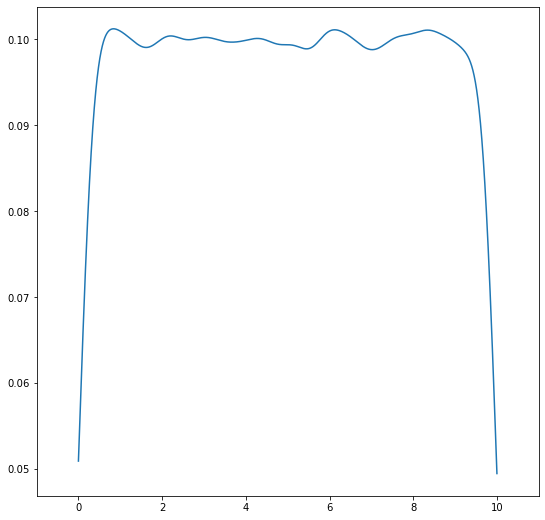

In [39]:
density = stats.gaussian_kde(x)
x_vals = np.linspace(-1, 11, 100000)
#plt.figure.figsize(9,9)
plt.figure(figsize=(9,9))
plt.plot(x_vals,density(x_vals))
#plt.hist(X1, density=True, histtype='stepfilled' , alpha = 0.2)
plt.xlim(-1, 11)
plt.show()



Check scipy libraries and use useful functions. 

cdf (cumulative distribution function) gives you the area under the distribution's density curve to the left of a certain value on the x axis. Calculate cdf with x axis from 0 to 2.5. 

In [46]:
stats.uniform.cdf(2.5,0,10)

0.25

ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. Caculate the cutoff value for propabality with 40%.

In [48]:
stats.uniform.ppf(.40, 0, 10)

4.0

Demonstrate for uniform distribution, x values within the range will have the same probability desity.  x values outside the range have a probability density of 0. The output is similar as the following.

In [49]:
print('Density at x value -1')
print(stats.uniform.pdf(-1, 0, 10))
print('Density at x value 2')
print(stats.uniform.pdf(2, 0, 10))
print('Density at x value 5')
print(stats.uniform.pdf(5, 0, 10))
print('Density at x value 8')
print(stats.uniform.pdf(8, 0, 10))
print('Density at x value 11')
print(stats.uniform.pdf(11, 0, 10))


Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

## The Normal Distribution


Use scipy's norm to have normal distribution (see the graph below) .  The normal distribution has default vaues of  mean of 0 and standard deviation of 1. Investigate what percentage of data generated by a default normal distribution is below -1. What percentage of data generated is above 1 and what percentage lies between -1 and 1. Print the three percentages. The output is similar as the following. 

In [53]:
print(stats.norm.cdf(-1))
print(1-(stats.norm.cdf(1)))
print(1-(stats.norm.cdf(-1))-(1-(stats.norm.cdf(1))))

0.15865525393145707
0.15865525393145707
0.6826894921370859


Plotting is not required. The codes will be included in the solution. The image below shows the bell shape normal distribution.  

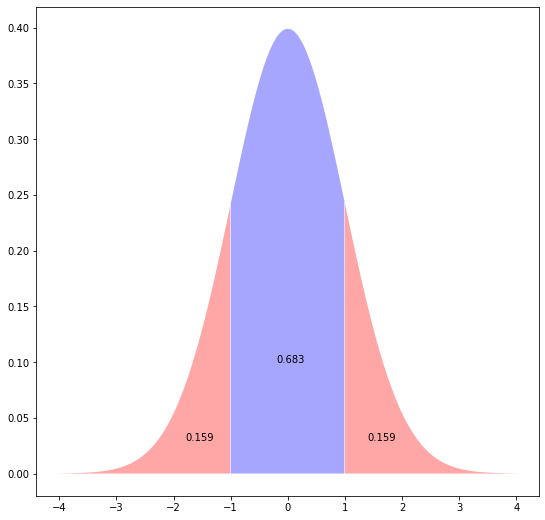


print the ppf for 2.5% cutoff and 97.5% cutoff. The output is similar as the following

In [55]:
print(stats.norm.ppf(.025))
print(stats.norm.ppf(.975))

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.


## The Binomial Distribution

We will use binomial distribution to model coin flips. The scipy name for the binomial is binom. Here we set the number of flips per trial to 10,  the number of trials to 10000, and success probability to 0.5. 

Create a random binomial distribution data "fair_coin_flips" in the code line below.

In [72]:
import pandas as pd
fair_coin_flips=stats.binom.rvs(n=10,p=0.5, size=10000)
fair_coin_flips

array([5, 4, 4, ..., 6, 6, 6])

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts  11  113  440  1140  2021  2484  2077  1152  452  93  17


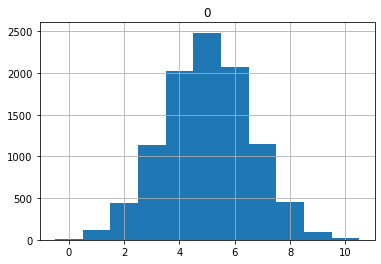

In [73]:
# Codes are provided here. 
# Print out the counts for 0 heads, 1 head, ...10 heads of each trial with 10000 trials. 
print( pd.crosstab(index="counts", columns= fair_coin_flips))
# Draw the histogram.
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

The histogram above shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. 
Change the success rate to 0.8, implement the codes similar as above to show the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   6  67  272  880  2001  3027  2714  1033


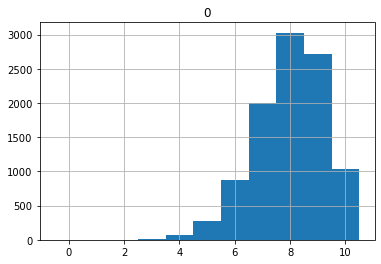

In [75]:
fair_coin_flips=stats.binom.rvs(n=10,p=0.8, size=10000)
fair_coin_flips
# Codes are provided here. 
# Print out the counts for 0 heads, 1 head, ...10 heads of each trial with 10000 trials. 
print( pd.crosstab(index="counts", columns= fair_coin_flips))
# Draw the histogram.
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 5 heads or less with 10 flips.

In [78]:
stats.binom.cdf(5, 10, .8)

0.03279349759999997

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 9 heads or more with 10 flips.

In [92]:
stats.binom.cdf(1, 10, .2)

0.3758096384000002

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k. 
Write codes to give the probability density at 5 heads with success rate of 0.5 of 10 flips.

In [93]:
stats.binom.pmf(5,10,.5)

0.24609375000000003

What about the probability density at 8 heads with success rate of 0.8 of 10 flips?

In [94]:
stats.binom.pmf(8,10,.8)

0.30198988799999993

## Wrap Up

Extra information of Exponential Distributions and Poisson Distributions will be given in the solution. 


Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://docs.scipy.org/doc/scipy/reference/stats.html) in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.
